# Exercises 0

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping

### 0. MLP for regression (*)
We will continue with the dataset that we used in the lecture with predicting miles per gallons using an MLP for regression.

a) Load the mpg dataset using seaborn. (*)



In [3]:
mpg = sns.load_dataset("mpg").drop("name", axis=1)
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


b) Use your data analysis skills to perform EDA. (*)

In [4]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
mpg.info() #Six missing values for horsepower

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


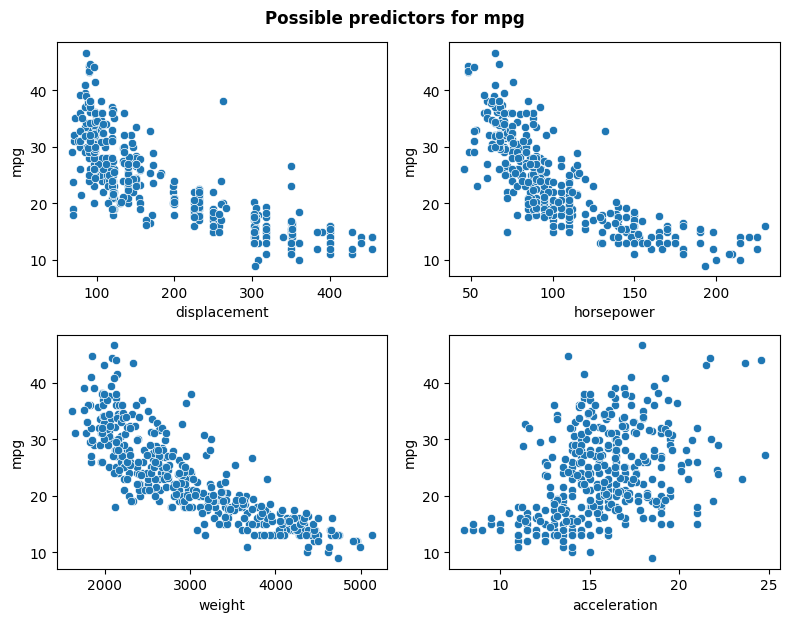

In [6]:
#Plotting the data

fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=100)

for ax, feature in zip(axes.flatten(), mpg.columns[2:6]):
  sns.scatterplot(data=mpg, x=feature, y="mpg", ax = ax)

fig.tight_layout()
_ = fig.suptitle("Possible predictors for mpg", y=1.03, fontweight="bold")

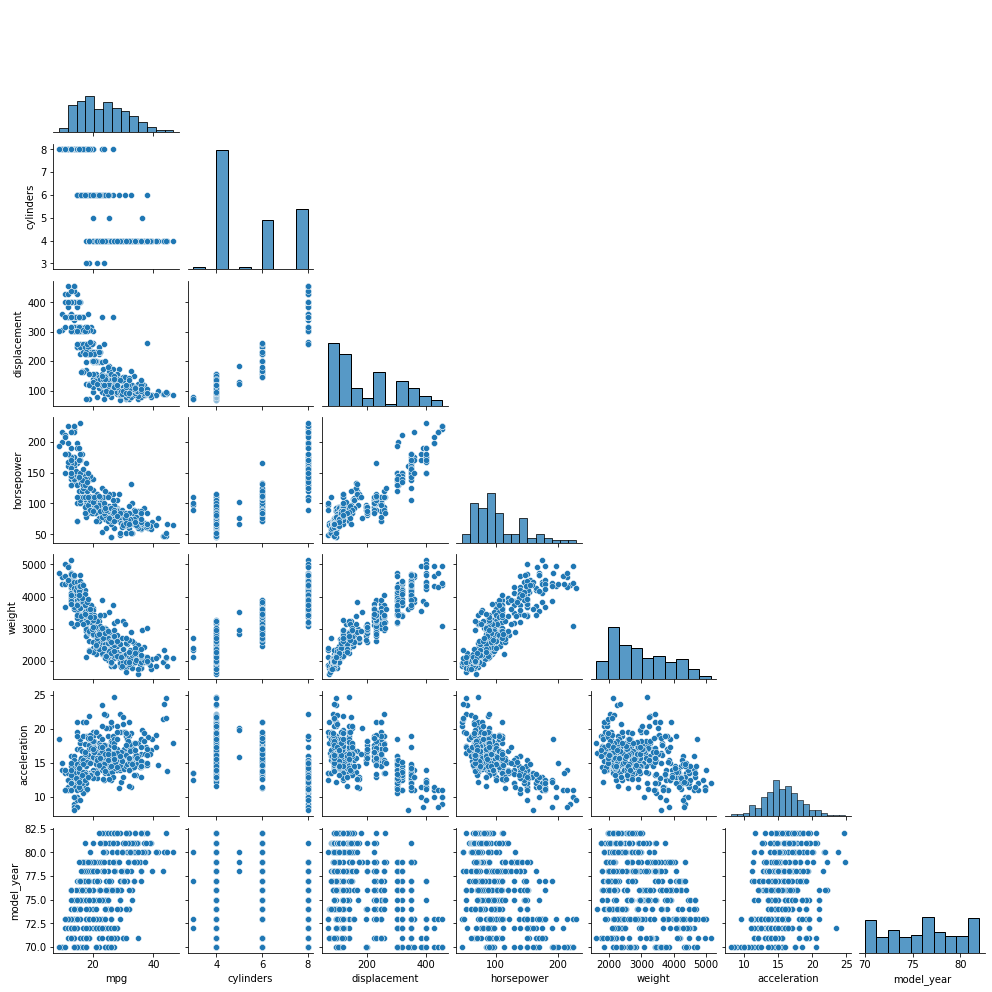

In [7]:
sns.pairplot(mpg, corner=True, height = 2)

c) Find out the missing values in the dataset and use a machine learning model to fill them in (imputation). (**)

In [4]:
# Dummy code origin to be able to use it as a predictor
mpg = pd.get_dummies(mpg, columns=["origin"], drop_first=True)
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,1


In [5]:
#Checks the rows containing missing values and remove horsepower
rows_to_impute = mpg.query("horsepower.isna()").drop("horsepower", axis=1)
rows_to_impute

,mpg,cylinders,displacement,weight,acceleration,model_year,origin_japan,origin_usa
32,25.0,4,98.0,2046,19.0,71,0,1
126,21.0,6,200.0,2875,17.0,74,0,1
330,40.9,4,85.0,1835,17.3,80,0,0
336,23.6,4,140.0,2905,14.3,80,0,1
354,34.5,4,100.0,2320,15.8,81,0,0
374,23.0,4,151.0,3035,20.5,82,0,1


In [6]:
# Drop the missing values from the full dataset and split it into X and y
mpg_dropped_missing = mpg.dropna()
X, y = mpg_dropped_missing.drop("horsepower", axis = 1), mpg_dropped_missing["horsepower"]

In [7]:
# Predict and impute the values
model_lin_reg = LinearRegression()
model_lin_reg.fit(X, y)
rows_to_impute["horsepower"] = model_lin_reg.predict(rows_to_impute)
rows_to_impute

,mpg,cylinders,displacement,weight,acceleration,model_year,origin_japan,origin_usa,horsepower
32,25.0,4,98.0,2046,19.0,71,0,1,58.614281
126,21.0,6,200.0,2875,17.0,74,0,1,94.048596
330,40.9,4,85.0,1835,17.3,80,0,0,57.113292
336,23.6,4,140.0,2905,14.3,80,0,1,98.038273
354,34.5,4,100.0,2320,15.8,81,0,0,76.669622
374,23.0,4,151.0,3035,20.5,82,0,1,74.203424


In [8]:
# Merge the two dataframes
mpg_imputed = pd.concat([mpg_dropped_missing, rows_to_impute]).sort_index()
mpg_imputed

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,1


d) Can you figure out a way to see if the values filled in are reasonable? (**)

I can for example check MAE and RMSE for how well the model predicts horsepower. As can be seen below, the model is pretty good at predicting horsepower. I therefore believe that the values filled in are reasonable. However, this assumption, is based on that the values are missing at random. 

Also, we should be a bit cautious when using this approach on too many values. We have now removed the noise for the imputed values. 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [10]:
# Create model and make predictions
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)
y_pred = model_lin_reg.predict(X_test)

# Evaluate
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {MAE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"Horsepower range: {y_test.max() - y_test.min()}")
print(f"Horsepower SD: {y_test.std():.2f}")

MAE: 9.08
RMSE: 11.87
Horsepower range: 179.0
Horsepower SD: 39.45


e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)

In [11]:
X, y = mpg_imputed.drop("mpg", axis=1).values, mpg_imputed["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((278, 8), (60, 8), (60, 8), (278,), (60,), (60,))

f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

In [21]:
def create_model_MLP(number_of_layers, number_of_nodes):
    model_MLP = Sequential(name = "MLP") # Here we add the input layer
    
    model_MLP.add(InputLayer(X_train.shape[1])) # We specify the number of features
    
    model_MLP.add(Dense(20, name="Hidden_layer_1")) # Hidden layers
    if number_of_layers == 2 or number_of_layers == 3:
        model_MLP.add(Dense(number_of_nodes, name="Hidden_layer_2")) # Hidden layers
        if number_of_layers == 3:
            model_MLP.add(Dense(number_of_nodes, name="Hidden_layer_3")) # Hidden layers

    model_MLP.add(Dense(1, name = "Output_layer")) # Note no activation function --> linear activation

    model_MLP.compile(loss = "mean_squared_error", optimizer = SGD(learning_rate=.01))
    
    return model_MLP

model_MLP = KerasRegressor(build_fn=create_model_MLP, verbose=1, epochs=50)

/var/folders/1s/8yq58qp97_9c9z1bcxs9mf940000gn/T/ipykernel_31865/365820703.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_MLP = KerasRegressor(build_fn=create_model_MLP, verbose=1, epochs=50)


In [14]:
pipeline_MLP = Pipeline([
                        ('scaler', None),
                        ('model_MLP', model_MLP)
]) 

param_grid_MLP = {
                "scaler" : [StandardScaler(), MinMaxScaler()],
                "model_MLP__number_of_layers" : [1, 2, 3],
                "model_MLP__number_of_nodes" : [40, 50, 60]
} 

CV_results_MLP = GridSearchCV(estimator=pipeline_MLP, param_grid=param_grid_MLP, cv=5, verbose=1)

In [15]:
CV_results_MLP.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


2022-04-20 14:04:37.641285: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
7/7 [==============================] - 1s 2ms/step - loss: 341.6377
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 16.4380
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 14.5476
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 13.0332
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 20.8334
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 16.5167
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 14.6598
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: 34.8685
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 14.9486
Epoch 10/50
7/7 [==============================] - 0s 4ms/step - loss: 13.6869
Epoch 11/50
7/7 [==============================] - 0s 4ms/step - loss: 13.0336
Epoch 12/50
7/7 [==============================] - 0s 5ms/step - loss: 15.1477
Epoch 13/50
7/7 [==============================] - 0s 5ms/st

/Users/anna-mariasjolund/.local/share/virtualenvs/Deep-Learning-Anna-MariaSjolund-0DMhVJHL/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [-13.16245918 -14.40685749 -13.95379467 -15.61008568 -13.72091999
 -14.47258911          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan]
  warnings.warn(


9/9 [==============================] - 1s 5ms/step - loss: 267.9345
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 38.5628
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 35.0161
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 12.6098
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 13.2522
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 12.9043
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 15.5633
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 17.6087
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 14.5915
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 12.9366
Epoch 11/50
9/9 [==============================] - 0s 3ms/step - loss: 13.7024
Epoch 12/50
9/9 [==============================] - 0s 8ms/step - loss: 13.1892
Epoch 13/50
9/9 [==============================] - 0s 3ms/step - loss:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('model_MLP',
                                        <keras.wrappers.scikit_learn.KerasRegressor object at 0x14f769f70>)]),
             param_grid={'model_MLP__number_of_layers': [1, 2, 3],
                         'model_MLP__number_of_nodes': [40, 50, 60],
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             verbose=1)

In [16]:
print(CV_results_MLP.best_params_)

{'model_MLP__number_of_layers': 1, 'model_MLP__number_of_nodes': 40, 'scaler': StandardScaler()}


g) Now use early stopping to tune the number of epochs. (*)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [22]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model = create_model_MLP(1, 40)
model.fit(X_train_scaled, y_train, epochs=1000, validation_data=[X_val_scaled, y_val], callbacks=[early_stopper], verbose=1)

Epoch 1/1000
9/9 [==============================] - 1s 21ms/step - loss: 260.0875 - val_loss: 11.3598
Epoch 2/1000
9/9 [==============================] - 0s 7ms/step - loss: 22.0494 - val_loss: 29.4420
Epoch 3/1000
9/9 [==============================] - 0s 12ms/step - loss: 33.0058 - val_loss: 19.3416
Epoch 4/1000
9/9 [==============================] - 0s 25ms/step - loss: 15.2378 - val_loss: 10.4851
Epoch 5/1000
9/9 [==============================] - 0s 13ms/step - loss: 12.6628 - val_loss: 11.4137
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 14.0674 - val_loss: 11.0753
Epoch 7/1000
9/9 [==============================] - 0s 10ms/step - loss: 12.1492 - val_loss: 10.1410
Epoch 8/1000
9/9 [==============================] - 0s 8ms/step - loss: 13.6622 - val_loss: 10.4909
Epoch 9/1000
9/9 [==============================] - 0s 9ms/step - loss: 18.7317 - val_loss: 10.7032
Epoch 10/1000
9/9 [==============================] - 0s 13ms/step - loss: 14.8547 - val_loss: 

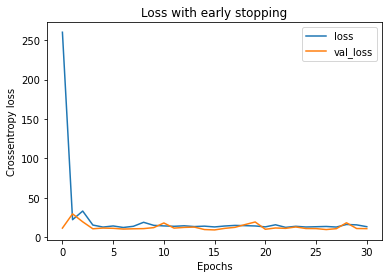

In [23]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot(xlabel="Epochs",
             ylabel="Crossentropy loss", title="Loss with early stopping");

h) Train on all training data and validation data. (*)

In [30]:
X_train_full = np.concatenate((X_train, X_val))
y_train_full = np.concatenate((y_train, y_val))

In [31]:
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = create_model_MLP(1, 40)
model.fit(X_train_full_scaled, y_train_full, epochs=31, validation_split=.2, verbose=1)

Epoch 1/31
9/9 [==============================] - 1s 21ms/step - loss: 280.4181 - val_loss: 15.2690
Epoch 2/31
9/9 [==============================] - 0s 7ms/step - loss: 24.6688 - val_loss: 13.6901
Epoch 3/31
9/9 [==============================] - 0s 12ms/step - loss: 15.3300 - val_loss: 60.6155
Epoch 4/31
9/9 [==============================] - 0s 13ms/step - loss: 29.4101 - val_loss: 14.0996
Epoch 5/31
9/9 [==============================] - 0s 11ms/step - loss: 16.6096 - val_loss: 40.9534
Epoch 6/31
9/9 [==============================] - 0s 8ms/step - loss: 12.4462 - val_loss: 15.7930
Epoch 7/31
9/9 [==============================] - 0s 9ms/step - loss: 16.7512 - val_loss: 17.0679
Epoch 8/31
9/9 [==============================] - 0s 12ms/step - loss: 12.9377 - val_loss: 26.3316
Epoch 9/31
9/9 [==============================] - 0s 11ms/step - loss: 16.0425 - val_loss: 14.0456
Epoch 10/31
9/9 [==============================] - 0s 10ms/step - loss: 12.4494 - val_loss: 43.5419
Epoch 11/31

i) Predict on test data and evaluate. (*)

In [38]:
y_pred = model.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {MAE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"MPG range: {y_test.max() - y_test.min()}")
print(f"MPG SD: {y_test.std():.2f}")


MAE: 2.48
RMSE: 3.36
MPG range: 34.0
MPG SD: 8.11


j) Can you create an MLP model that beats random forest for this dataset? (**)